<a href="https://colab.research.google.com/github/callezenwaka/machine-learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [7]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pandas.plotting import scatter_matrix

In [8]:
# define seed
SEED = 1234

In [9]:
# set seed value for reproducibility
np.random.seed(SEED)
random.seed(SEED)

# Load Data

In [10]:
# read from csv to pandas dataframe
url =  "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/tumors.csv"
df = pd.read_csv(url, header=0) # load data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,15.335860,14.637535,benign
1,9.857535,14.518942,malignant
2,17.632579,15.869585,benign
3,18.369174,14.774547,benign
4,14.509367,15.892224,malignant


In [11]:
# define X and y
X = df[['leukocyte_count', 'blood_pressure']].values
y = df['tumor_class'].values

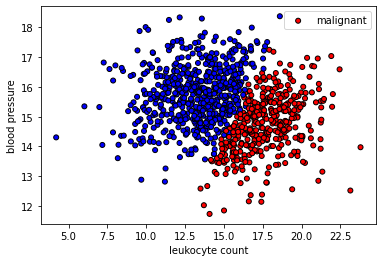

In [12]:
# plot data
colors = {'benign': 'red', 'malignant': 'blue'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel("leukocyte count")
plt.ylabel("blood pressure")
plt.legend(['malignant', 'benign'], loc="upper right")
plt.show()

# Split Dataset

In [13]:
# import dependencies
import collections
from sklearn.model_selection import  train_test_split

In [14]:
# define split sizes
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [15]:
# define split function
def train_val_test_split(X, y, train_size):
  """Split dataset into data splits."""
  X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
  X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [16]:
# create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X=X, y=y, train_size=TRAIN_SIZE)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
for i in range(5):
  print(f"Sample point: {X_train[i]} → {y_train[i]}")
# print(f"Sample point: {X_train[0:5]} → {y_train[0:5]}")

X_train: (700, 2), y_train: (700,)
X_val: (150, 2), y_val: (150,)
X_test: (150, 2), y_test: (150,)
Sample point: [14.95081332 14.86441305] → malignant
Sample point: [11.29345802 14.14420177] → malignant
Sample point: [12.14979266 15.04625025] → malignant
Sample point: [17.78509137 14.2140526 ] → benign
Sample point: [13.47296862 15.25039322] → malignant


In [17]:
# overall class distribution
class_counts = dict(collections.Counter(y))
print(f"Classes: {class_counts}")
print(f"m:b = {class_counts['malignant']/class_counts['benign']:.2f}")

Classes: {'benign': 389, 'malignant': 611}
m:b = 1.57


In [18]:
# per data split class distribution
train_class_counts = dict(collections.Counter(y_train))
val_class_counts = dict(collections.Counter(y_val))
test_class_counts = dict(collections.Counter(y_test))
print(f"train m:b = {train_class_counts['malignant']/train_class_counts['benign']:.2f}")
print(f"val m:b = {val_class_counts['malignant']/val_class_counts['benign']:.2f}")
print(f"test m:b = {test_class_counts['malignant']/test_class_counts['benign']:.2f}")

train m:b = 1.57
val m:b = 1.54
test m:b = 1.59


# Label Encoding

In [19]:
# import dependencies
import itertools

In [20]:
# define LabelEncoder function
class LabelEncoder(object):
  """Label encoder for tag labels."""

  def __init__(self, class_to_index={}):
    """Initialize label encoder."""
    self.class_to_index = class_to_index
    self.index_to_class = {v: k for k, v in self.class_to_index.items()}
    self.classes = list(self.class_to_index.keys())

  def __len__(self):
    return len(self.class_to_index)

  def __str__(self):
    return f"<LabelEncoder(num_classes={len(self)})>"

  def fit(self, y):
    classes = np.unique(y)
    for i, class_ in enumerate(classes):
      self.class_to_index[class_] = i
    self.index_to_class = {v: k for k, v in self.class_to_index.items()}
    self.classes = list(self.class_to_index.keys())
    return self

  def encode(self, y):
    encoded = np.zeros((len(y)), dtype=int)
    for i, item in enumerate(y):
      encoded[i] = self.class_to_index[item]
    return encoded

  def decode(self, y):
    classes = []
    for i, item in enumerate(y):
      classes.append(self.index_to_class[item])
    return classes
  
  def save(self, fp):
    with open(fp, 'w') as fp:
      contents = {'class_to_index': self.class_to_index}
      json.dump(contents, fp, indent=4, sort_keys=False)

  @classmethod
  def load(cls, fp):
    with open(fp, 'r') as fp:
      kwargs = json.load(fp=fp)
    return cls(**kwargs)

In [21]:
# fit
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
label_encoder.class_to_index

{'benign': 0, 'malignant': 1}

In [22]:
# encoder
print(f"y_train[0]: {y_train[0]}")
y_train = label_encoder.encode(y_train)
y_val = label_encoder.encode(y_val)
y_test = label_encoder.encode(y_test)
print(f"y_train[0]: {y_train[0]}")
print(f"decoded: {label_encoder.decode([y_train[0]])}")

y_train[0]: malignant
y_train[0]: 1
decoded: ['malignant']


In [23]:
# class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print(f"counts: {counts}\nweights: {class_weights}")

counts: [272 428]
weights: {0: 0.003676470588235294, 1: 0.002336448598130841}


# Standardize Data

In [24]:
# using StandardScaler
from sklearn.preprocessing import StandardScaler

In [25]:
# standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

In [26]:
# apply scaler on training & test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [27]:
# check: (means should be ~0 and std be ~1)
print(f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print(f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")

X_test[0]: mean: -0.1, std: 1.0
X_test[1]: mean: -0.1, std: 1.0


# Logistic Regression with Numpy

# Initialize weights

In [22]:
# initialize hyperparameters
INPUT_DIM = X_train.shape[1] # X is 2-dimensional
NUM_CLASSES = len(label_encoder.classes) # y has 2 possibilities (benign or malignant)
LEARNING_RATE = 1e-1
NUM_EPOCHS = 50

In [23]:
# initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASSES)
b = np.zeros((1, NUM_CLASSES))
print(f"W: {W.shape}")
print(f"b: {b.shape}")

W: (2, 2)
b: (1, 2)


# Model

In [24]:
# forward pass [Nx2] · [2x2] + [1,2] = [Nx2]
logits = np.dot(X_train, W) + b
print(f"logits: {logits.shape}")
print(f"sample: {logits[0]}")

logits: (700, 2)
sample: [-0.0069945   0.00647147]


In [25]:
# normalization via softmax to obtain class probabilities
exp_logits = np.exp(logits)
y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
print(f"y_hat: {y_hat.shape}")
print(f"sample: {y_hat[0]}")

y_hat: (700, 2)
sample: [0.49663356 0.50336644]


# Loss

In [26]:
# calculate loss
correct_class_logprobs = -np.log(y_hat[range(len(y_hat)) , y_train])
loss = np.sum(correct_class_logprobs) / len(y_train)
print(f"loss: {loss:.2f}")

loss: 0.70


# Gradient

In [27]:
# calculate backpropagation
dscores = y_hat
dscores[range(len(y_hat)), y_train] -= 1
dscores /= len(y_train)
dW = np.dot(X_train.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)

# Update Weights

In [28]:
# update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

# Training

In [29]:
# initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASSES)
b = np.zeros((1, NUM_CLASSES))

In [30]:
# training loop
for epoch_num in range(NUM_EPOCHS):

  # forward pass [Nx2] · [2x2] = [Nx2]
  logits = np.dot(X_train, W) + b

  # normalization via softmax to obtain class probabilities
  exp_logits = np.exp(logits)
  y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

  # loss
  correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
  loss = np.sum(correct_class_logprobs) / len(y_train)

  # show training progress
  if epoch_num%10 == 0:
    # accuracy
    y_pred = np.argmax(logits, axis=1)
    accuracy = np.mean(np.equal(y_train, y_pred))
    print(f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")

  # backpropagation
  dscores = y_hat
  dscores[range(len(y_hat)), y_train] -= 1
  dscores /= len(y_train)
  dW = np.dot(X_train.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  # update weights
  W += -LEARNING_RATE * dW
  b += -LEARNING_RATE * db

Epoch: 0, loss: 0.684, accuracy: 0.897
Epoch: 10, loss: 0.446, accuracy: 0.970
Epoch: 20, loss: 0.349, accuracy: 0.973
Epoch: 30, loss: 0.297, accuracy: 0.973
Epoch: 40, loss: 0.263, accuracy: 0.973


# Evaluation

In [31]:
# define LogisticRegressionFromScratch class
class LogisticRegressionFromScratch():
  """Define LogisticRegressionFromScratch class."""
  
  def predict(self, x):
    """Define predict function."""
    logits = np.dot(x, W) + b
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    return y_hat

In [32]:
# model evaluation
model = LogisticRegressionFromScratch()
logits_train = model.predict(X_train)
pred_train = np.argmax(logits_train, axis=1)
logits_test = model.predict(X_test)
pred_test = np.argmax(logits_test, axis=1)

In [33]:
# training & test accuracy
train_acc = np.mean(np.equal(y_train, pred_train))
test_acc = np.mean(np.equal(y_test, pred_test))
print(f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.97, test acc: 0.97


In [34]:
# define plot function
def plot_multiclass_decision_boundary(model, X, y, savefig_fp=None):
  """Plot the multiclass decision boundary for a model that accepts 2D inputs.
  Credit: https://cs231n.github.io/neural-networks-case-study/

  Arguments:
      model {function} -- trained model with function model.predict(x_in).
      X {numpy.ndarray} -- 2D inputs with shape (N, 2).
      y {numpy.ndarray} -- 1D outputs with shape (N,).
  """

  # axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[: 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                       np.linspace(y_min, y_max, 101))

  # create predictions
  x_in = np.c_[(xx.ravel(), yy.ravel())]
  y_pred = model.predict(x_in)
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  # plot
  if savefig_fp:
    plt.savefig(savefig_fp, format="png")

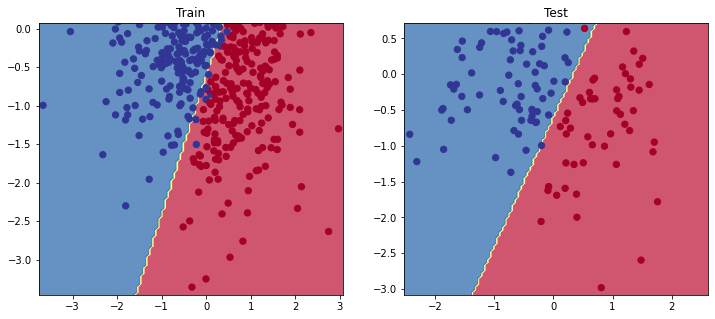

In [35]:
# visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()

# Logistic Regression with PyTorch

In [2]:
# import dependencies
import torch

In [5]:
# set seed for reproducibility
SEED = 1234
torch.manual_seed(SEED)

# Initialize weights

In [28]:
# initialize hyperparameters
INPUT_DIM = X_train.shape[1] # X is 2-dimensional
NUM_CLASSES = len(label_encoder.classes) # y has 2 possibilities (benign or malignant)
LEARNING_RATE = 1e-1
NUM_EPOCHS = 50

# Model

In [29]:
# build model
from torch import nn
import torch.nn.functional as F

In [30]:
# define LogisticRegression class
class LogisticRegression(nn.Module):
  """Define LogisticRegresesion class."""

  def __init__(self, input_dim, num_classes):
    """Initialize LogisticRegression class."""
    super(LogisticRegression, self).__init__()
    self.fc1 = nn.Linear(input_dim, num_classes)

  def forward(self, x_in, apply_softmax=False):
    y_pred = self.fc1(x_in)
    if apply_softmax:
      y_pred = F.softmax(y_pred, dim=1)
    return y_pred    

In [31]:
# initialize model
model = LogisticRegression(input_dim=INPUT_DIM, num_classes=NUM_CLASSES)
print(model.named_parameters)

<bound method Module.named_parameters of LogisticRegression(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
)>


# Loss

In [32]:
# calculate loss
loss_fn = nn.CrossEntropyLoss()
y_pred = torch.randn(3, NUM_CLASSES, requires_grad=False)
y_true = torch.empty(3, dtype=torch.long).random_(NUM_CLASSES)
print("y_true: ", y_true)
loss = loss_fn(y_pred, y_true)
print(f"Loss: {loss.numpy()}")

y_true:  tensor([0, 0, 0])
Loss: 1.2779091596603394


In [33]:
# define loss
class_weights_tensor = torch.Tensor(list(class_weights.values()))
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)

# Metrics

In [34]:
# define accuracy function
def accuracy_fn(y_pred, y_true):
  n_correct = torch.eq(y_pred, y_true).sum().item()
  accuracy = (n_correct / len(y_pred)) * 100
  return accuracy

In [35]:
# calculate accuracy
y_pred = torch.Tensor([0,0,1])
y_true = torch.Tensor([1,1,1])
print(f"Accuracy: {accuracy_fn(y_pred, y_true):.1f}")

Accuracy: 33.3


# Optimizer

In [36]:
# import optimizer
from torch.optim import Adam

In [37]:
# optimize model
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

# Training

P.S: Change runtime to GPU to avoid errors with LongTensor
![](https://raw.githubusercontent.com/callezenwaka/machine-learning/main/change_to_GPU.PNG)


In [38]:
# convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [39]:
# training model
for epoch in range(NUM_EPOCHS):

  # forward pass
  y_pred = model(X_train)

  # loss
  loss = loss_fn(y_pred, y_train)

  # zero all gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # update weights
  optimizer.step()

  # show training progress
  if epoch%10 == 0:
    predictions = y_pred.max(dim=1)[1] # class
    accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
    print(f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 0.96, accuracy: 60.7
Epoch: 10 | loss: 0.28, accuracy: 87.0
Epoch: 20 | loss: 0.15, accuracy: 95.6
Epoch: 30 | loss: 0.12, accuracy: 97.7
Epoch: 40 | loss: 0.10, accuracy: 98.3


# Evaluation

In [40]:
# import dependencies
from sklearn.metrics import accuracy_score

In [41]:
# predictions
pred_train = model(X_train, apply_softmax=True)
pred_test = model(X_test, apply_softmax=True)
print(f"sample probability: {pred_test[0]}")
pred_train = pred_train.max(dim=1)[1]
pred_test = pred_test.max(dim=1)[1]
print(f"sample class: {pred_test[0]}")

sample probability: tensor([0.0449, 0.9551], grad_fn=<SelectBackward>)
sample class: 1


In [42]:
# accuracy (could've also used our own accuracy function)
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print(f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.98, test acc: 0.98


In [43]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [44]:
def get_metrics(y_true, y_pred, classes):
    """Per-class performance metrics."""
    # Performance
    performance = {"overall": {}, "class": {}}

    # Overall performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance["overall"]["precision"] = metrics[0]
    performance["overall"]["recall"] = metrics[1]
    performance["overall"]["f1"] = metrics[2]
    performance["overall"]["num_samples"] = np.float64(len(y_true))

    # Per-class performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None)
    for i in range(len(classes)):
        performance["class"][classes[i]] = {
            "precision": metrics[0][i],
            "recall": metrics[1][i],
            "f1": metrics[2][i],
            "num_samples": np.float64(metrics[3][i]),
        }

    return performance

In [45]:
# Performance report
performance = get_metrics(y_true=y_test, y_pred=pred_test, classes=label_encoder.classes)
print (json.dumps(performance, indent=2))

{
  "overall": {
    "precision": 0.9800264101112998,
    "recall": 0.98,
    "f1": 0.9799670975323149,
    "num_samples": 150.0
  },
  "class": {
    "benign": {
      "precision": 0.9824561403508771,
      "recall": 0.9655172413793104,
      "f1": 0.9739130434782608,
      "num_samples": 58.0
    },
    "malignant": {
      "precision": 0.978494623655914,
      "recall": 0.9891304347826086,
      "f1": 0.9837837837837837,
      "num_samples": 92.0
    }
  }
}


In [46]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = plt.cm.Spectral

    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = model(X_test, apply_softmax=True)
    _, y_pred = y_pred.max(dim=1)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

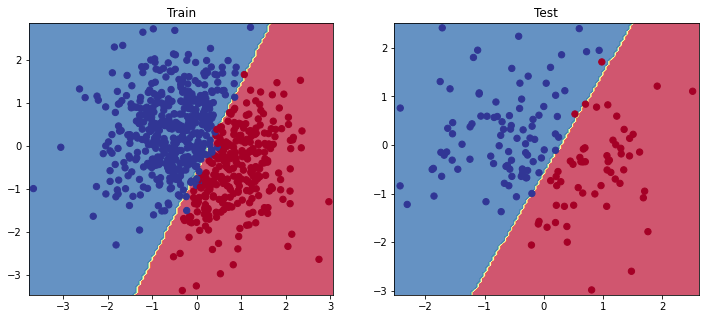

In [47]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()

# Inferrence

In [48]:
# Inputs for inference
X_infer = pd.DataFrame([{'leukocyte_count': 13, 'blood_pressure': 12}])

In [49]:
# Standardize
X_infer = X_scaler.transform(X_infer)
print (X_infer)

[[-0.68505296 -3.11487099]]


In [50]:
# Predict
y_infer = model(torch.Tensor(X_infer), apply_softmax=True)
prob, _class = y_infer.max(dim=1)
label = label_encoder.decode(_class.detach().numpy())[0]
print (f"The probability that you have a {label} tumor is {prob.detach().numpy()[0]*100.0:.0f}%")

The probability that you have a benign tumor is 93%


# Unscaled weights

# Unstandardize Weights

In [52]:
# Unstandardize weights
W = model.fc1.weight.data.numpy()
b = model.fc1.bias.data.numpy()
W_unscaled = W / X_scaler.scale_
b_unscaled = b - np.sum((W_unscaled * X_scaler.mean_))
print("W_unscaled:\n", W_unscaled)
print("b_unscaled: ", b_unscaled)

W_unscaled:
 [[ 0.61299706 -1.18550914]
 [-0.9537106   0.88432882]]
b_unscaled:  [ 8.929328 10.233847]
